In [3]:
import torchvision.transforms

import torch.nn as nn

import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from CCdataset import CCdata
from CNN_model import CNN
from Autoencoder_model import Autoencoderv3
from ResNet_model import ResNet50
from ResNet_model import ResNet101
from ResNet_model import ResNet152
from EfficientNet_model import EfficientNet
import albumentations as A
from albumentations.pytorch import ToTensorV2
load_model=True

In [4]:
import torch
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}")

# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")

# Set the device
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

PyTorch version: 1.13.0
Is MPS (Metal Performance Shader) built? True
Is MPS available? True
Using device: mps


In [5]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


In [6]:
in_channel=3
num_classes=4
learning_rate=0.001
model = CNN(in_channels=in_channel, num_classes=num_classes).to(device=device)
# model=Autoencoderv3()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# phi_values = {
#     # tuple of: (phi_value,resolution, drop_rate)
#     'b0': (0, 224, 0.2),  # alpha,beta,gamma,depth=alpha**phi
#     'b1': (0.5, 240, 0.2),
#     'b2': (1, 260, 0.3),
#     'b3': (2, 300, 0.3),
#     'b4': (3, 380, 0.4),
#     'b5': (4, 456, 0.4),
#     'b6': (5, 528, 0.5),
#     'b7': (6, 600, 0.5),
#
# }
# version='b0'
# phi,res,drop_rate= phi_values[version]


# model= EfficientNet( version=version,num_classes=4).to(device=device)
# optimizer = optim.Adam(model.parameters(),lr=learning_rate)


In [26]:
# in_channel=1
# num_classes=4
# learning_rate=0.001
# model = ResNet50(img_channels=in_channel, num_classes=num_classes).to(device=device)
# criterion=nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
def load_checkpoint(checkpoint,model,optimizer):
    print('=> Loading checkpoint')
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    model.eval()


In [8]:
if load_model:
    load_checkpoint(torch.load('/Users/haoranyue/PycharmProjects/pythonProject/my_CNN_original_32_checkpoint_11_25.pth.tar'),model,optimizer)
    model.to(device=device)

=> Loading checkpoint


In [14]:

batch_size=64

# root_dir = '/Users/haoranyue/Documents/master_project/output5/'
# csv_dir= '/Users/haoranyue/Documents/master_project/check17961phase_true.csv'
# csv_dir = '/Users/haoranyue/Documents/master_project/label42961phase_true.csv'
# root_dir = '/Users/haoranyue/Documents/master_project/output5/'

# csv_dir = '/Users/haoranyue/Documents/master_project/label_true_0915.csv'
csv_dir = '/Users/haoranyue/Documents/master_project/df_test_11_24.csv'
root_dir = '/Users/haoranyue/Documents/master_project/output_18'
transform = A.Compose(
        [
            A.Resize(64, 64, ),
            # A.CenterCrop(60, 60,),
            # A.Resize(32, 32),
            A.Rotate(limit=40, p=0.6),
            A.HorizontalFlip(p=0.6),
            # A.RandomBrightnessContrast(p=0.6),
            A.VerticalFlip(p=0.2),
            A.VerticalFlip(p=0.6),
            A.OneOf(
                [
                    # A.Blur(blur_limit=3, p=0.8),
                    # A.Blur(blur_limit=3, p=0.5),
                    # A.ColorJitter(p=0.6),

                ], p=1.0
            ),
            ToTensorV2(),
        ]
    )
datasets = CCdata(csv_file=csv_dir,root_dir=root_dir,transform=transform)

train_size = int(0*len(datasets))
print(train_size)
test_size = len(datasets) - train_size
print(test_size)
train_set,test_set=torch.utils.data.random_split(datasets,[train_size ,test_size])
test_loader=DataLoader(dataset=test_set,batch_size=batch_size,shuffle= True)

0
15196


In [15]:
from sklearn.metrics import confusion_matrix
y_true_label=[]
y_pre=[]
ups_list=[]
model.eval()
with torch.no_grad():
    for index, (x,y) in enumerate(test_loader):
        print(y)
        x=x.to(device=device)
        y=y.to(device=device)
        _,y=y.max(1)
        listY=y.tolist()
        for i in listY:
            y_true_label.append(i)
        scores = model(x)

        # ups_list.append(ups)
        _,predictions= scores.max(1)
        predictions=predictions.tolist()
        for i in predictions:
            y_pre.append(i)

    # num_correct += (predictions==y).sum()
    # num_samples+= predictions.size(0)


tensor([[8.0677e-01, 3.8708e-01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 3.2807e-06, 0.0000e+00, 0.0000e+00],
        [7.1980e-10, 5.9125e-01, 0.0000e+00, 0.0000e+00],
        [8.4774e-15, 2.6984e-01, 9.9432e-01, 0.0000e+00],
        [3.1224e-04, 9.9869e-01, 0.0000e+00, 0.0000e+00],
        [4.9672e-09, 6.6244e-01, 0.0000e+00, 0.0000e+00],
        [8.0885e-01, 1.3987e-01, 0.0000e+00, 0.0000e+00],
        [1.5633e-04, 9.9290e-01, 0.0000e+00, 0.0000e+00],
        [6.1258e-01, 4.7041e-01, 0.0000e+00, 0.0000e+00],
        [1.6040e-11, 4.6332e-01, 7.4719e-01, 0.0000e+00],
        [3.3683e-12, 4.1657e-01, 8.4295e-01, 1.0000e+00],
        [5.5695e-08, 7.5448e-01, 0.0000e+00, 0.0000e+00],
        [9.7819e-01, 2.8697e-01, 0.0000e+00, 0.0000e+00],
        [1.8556e-03, 9.9018e-01, 0.0000e+00, 0.0000e+00],
        [2.1701e-19, 1.1653e-01, 8.3734e-01, 0.0000e+00],
        [2.4590e-03, 9.8507e-01, 0.0000e+00, 0.0000e+00],
        [9.4166e-01, 1.8438e-01, 0.0000e+00, 0.0000e+00],
        [9.996

In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_true_label, y_pre)

print(cf_matrix)


[[4386  442    0    0]
 [ 114 7403  182   15]
 [   0  603 1838   10]
 [   3   19   79  102]]


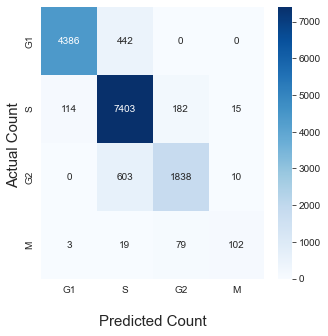

In [17]:
import seaborn as sns
plt.figure(figsize=(5,5))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='d')

# ax.set_title('Seaborn Confusion Matrix with labels\n\n',fontsize=20);
ax.set_xlabel('\nPredicted Count',fontsize=15)
ax.set_ylabel('Actual Count ',fontsize=15)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['G1','S','G2','M'])
ax.yaxis.set_ticklabels(['G1','S','G2','M'])

## Display the visualization of the Confusion Matrix.
plt.show()


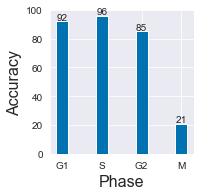

In [14]:
import matplotlib.pyplot as plt

def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i]+1,y_list[i], ha="center")


fig = plt.figure(figsize=(2,2))
ax = fig.add_axes([0,0,1,1])
phase = ['G1', 'S', 'G2', 'M']

# accuracy = [38.7,37.5,39.7,54.6]
# accuracy = [90,87.6,87.6,90]
accuracy = [30,36,75,96]
accuracy = [92,96,85,21]
ax.bar(phase,accuracy,width=0.3)
add_value_label(phase,accuracy)
# plt.title("Run pre-train EfficientNet on test set ",fontsize=16)
plt.xlabel("Phase",fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
ax.set_ylim([0, 100])
plt.style.use('seaborn-colorblind')
# plt.show()

In [ ]:
#efficientnet
loss_epoch=[1.1782373189926147, 0.9835134744644165, 0.955079197883606, 1.2338831424713135, 0.7726523876190186, 0.9281275272369385, 0.8270411491394043, 0.9970624446868896, 0.8738381862640381]
train_accurcy=[0.513957094856552, 0.5291095890410958, 0.5566683897647972, 0.5463621090721117, 0.604516670974412, 0.6190230033600413, 0.6227707417937451, 0.6617342982682863, 0.6863207547169812]
test_accuracy=[0.4989016668820261, 0.5137614678899083, 0.5407675410259724, 0.5274583279493474, 0.5654477322651505, 0.5677736141620364, 0.5676443985010984, 0.5755265538183227, 0.5655769479260886]

In [19]:
import pandas as pd
df_1=pd.read_csv('/Users/haoranyue/Documents/master_project/disseration_image/accuracy_epoch/epoch_CNN_25_11_train.csv')
df_2=pd.read_csv('/Users/haoranyue/Documents/master_project/disseration_image/accuracy_epoch/epoch_CNN_25_11_test.csv')
# df_3=pd.read_csv('/Users/haoranyue/Documents/master_project/disseration_image/accuracy_epoch/epoch_CNN_16_11_loss.csv')
x=df_1['Unnamed: 0']+1
x

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: Unnamed: 0, Length: 100, dtype: int64

In [20]:
x2=df_2['Unnamed: 0']+1
x2

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: Unnamed: 0, Length: 100, dtype: int64

In [23]:
df_1

,Unnamed: 0,train_accuracy
0,0,0.863623
1,1,0.885881
2,2,0.890772
3,3,0.853515
4,4,0.889366
...,...,...
95,95,0.899051
96,96,0.908851
97,97,0.895431
98,98,0.910738


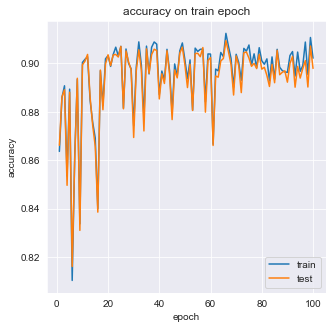

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
# line 1 points
y1 = df_1['train_accuracy']
x1 = x
# plotting the line 1 points
plt.plot(x1, y1, label = "train")

# line 2 points
x2 =x2
y2 = df_2['test_accuracy']
# plotting the line 2 points
plt.plot(x2, y2, label = "test")


# line 3 points
# x3 = x
# y3 = df_3['loss']
# plotting the line 2 points
# plt.plot(x3, y3, label = "loss")

# line 4 points
# x4 = x
# y4 = df_4['loss']
# plotting the line 2 points
# plt.plot(x4, y4, label = "ResNet101")

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('accuracy')
# giving a title to my graph
plt.title('accuracy on train epoch')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()


In [ ]:
# line 2 points
x2 = x
y2 = df_2['loss']
# plotting the line 2 points
plt.plot(x2, y2, label = "EfficientNet")

# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('loss')
# giving a title to my graph
plt.title('loss on train epoch')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()


In [ ]:
from sklearn.model_selection import KFold

kfold=KFold(n_splits=5)
for train_ind,test_ind in kfold.split([1,2,3,4,5,6,7,8,9]):
    print(train_ind,test_ind)


In [ ]:
m = nn.BatchNorm2d(2)
# Without Learnable Parameters
m = nn.BatchNorm2d(2, affine=False)
input = torch.randn(2, 2, 6, 6)
print(input)
output = m(input)
print(output)


In [ ]:
import pandas as pd

df_1=pd.read_csv('/Users/haoranyue/Documents/master_project/df_check_10_31.csv')


In [ ]:
df_1[df_1['Label']==3]
